# ***Análise de Acidentes de Trânsito nos EUA (2016-2023)*** 🚗

In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Carregamento de drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importacão do dados
df='/content/drive/MyDrive/A_projetofinalViz/data/US_Accidents_March23_sampled_500k.csv'
data = pd.read_csv(df)

data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


### **Limpeza**

In [ ]:
#informaçãoes gerais do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [ ]:
#verificação de valores ausentes
data.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

In [ ]:
#Identificaação de colunas numericas e categoricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(include=['object']).columns


# Preencher valores ausentes com 0 para colunas numericas
data[numeric_columns] = data[numeric_columns].fillna(0)
#e descinhecido para colunas categoricas
data[categorical_columns] = data[categorical_columns].fillna('missing')

print('\nValores ausentes após o preenchimento:')
print(data.isnull().sum())


Valores ausentes após o preenchimento:
ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway        

In [ ]:
#Verificação de dados duplicados
data.duplicated().sum()

0

In [ ]:
#Estatisticas descritivas
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,2.212748,36.206421,-94.736583,20.285638,-53.562654,0.564317,60.355875,43.203959,63.391696,29.009215,8.886235,7.113127,0.005925
std,0.486661,5.071411,17.405761,18.434282,49.444076,1.774872,20.768501,31.935039,24.513751,4.037190,2.998749,5.599938,0.086202
min,1.000000,24.562117,-124.497420,0.000000,-124.497419,0.000000,-77.800000,-53.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,0.000000,-93.346387,0.000000,48.000000,0.000000,47.000000,29.330000,10.000000,3.000000,0.000000
50%,2.000000,35.832147,-87.794365,28.538993,-76.381012,0.029000,63.000000,51.000000,66.000000,29.850000,10.000000,6.900000,0.000000
75%,2.000000,40.082443,-80.359601,37.512752,0.000000,0.465000,76.000000,71.000000,84.000000,30.030000,10.000000,10.000000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,0.000000,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


In [ ]:
print(data.dtypes)

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [ ]:
#Remoção de sufixo '.00000000' da coluna start time e converção de formato da data
data['Start_Time' ]=data['Start_Time'].str.replace('.000000000','',regex=False)
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

print(data['Start_Time'].isnull().sum())

3877


### **EDA**

<ipython-input-86-47344134b017>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




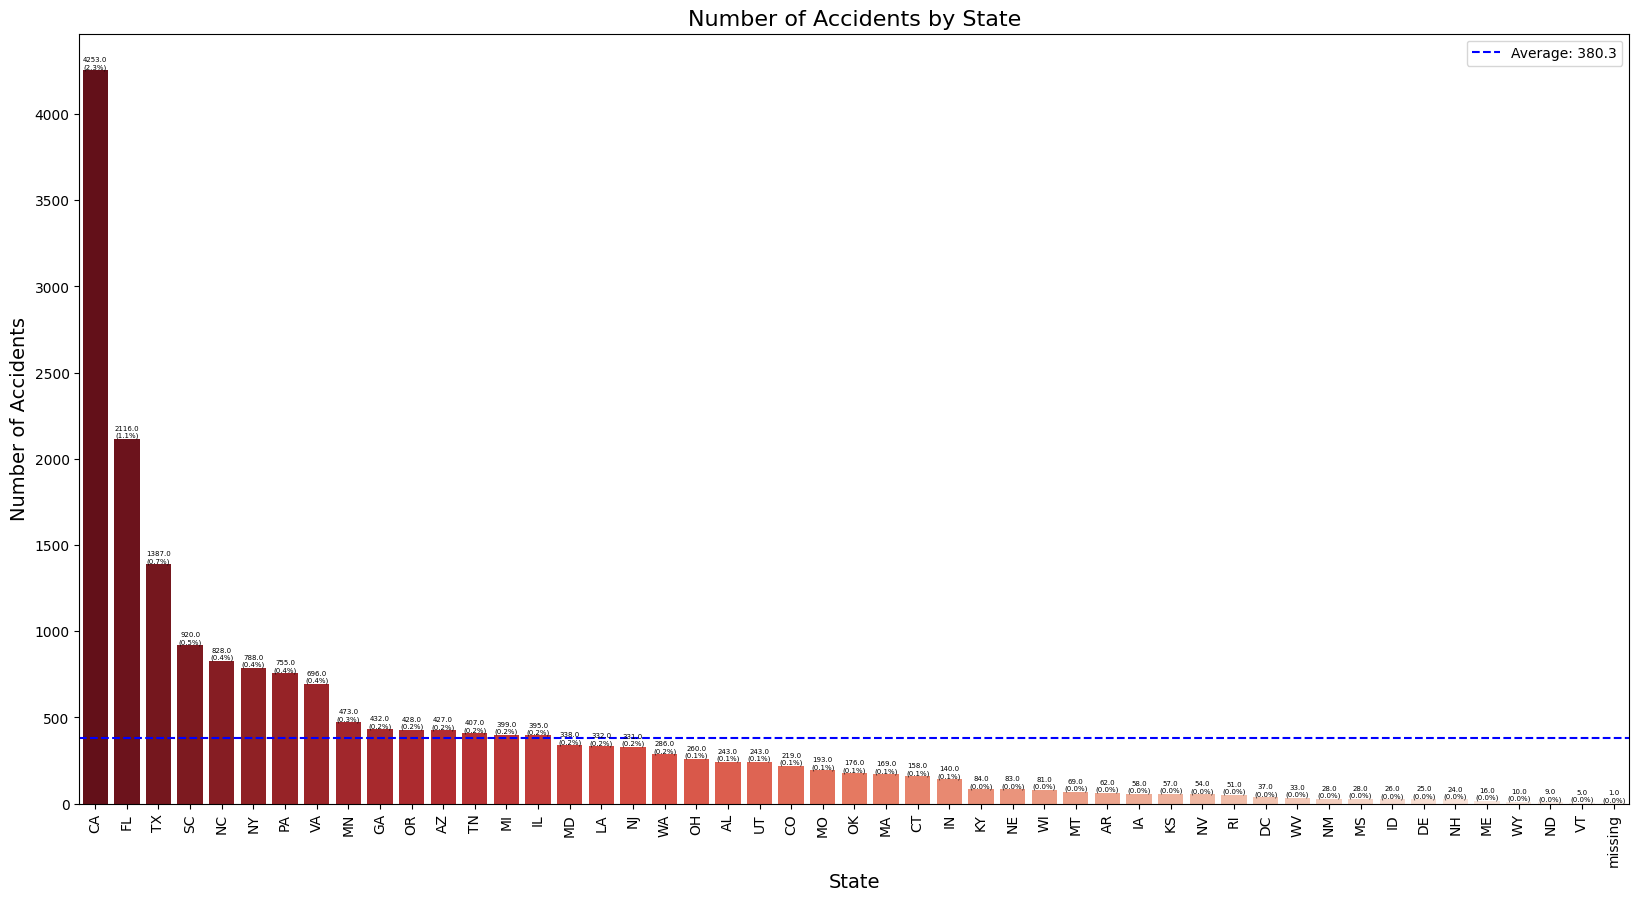

In [ ]:
# Gráfico 1: Número de Acidentes por Estado
accidents_by_state = data['State'].value_counts()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=accidents_by_state.index, y=accidents_by_state.values, palette="Reds_r")

# Adicionar rótulos de contagem nas barras
for p in ax.patches:
   ax.annotate(f'{p.get_height()}\n({p.get_height() / len(data) * 10:.1f}%)',
              (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', fontsize=5, color='black',
               xytext=(0, 5), textcoords='offset points')

# Adicionar linha de referência para a média
mean_accidents = accidents_by_state.mean()
plt.axhline(mean_accidents, color='blue', linestyle='--', label=f'Average: {mean_accidents:.1f}')
plt.legend()

plt.title('Number of Accidents by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=90)
plt.show()

<ipython-input-16-920f6a00d64b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Severity'], palette="Reds")


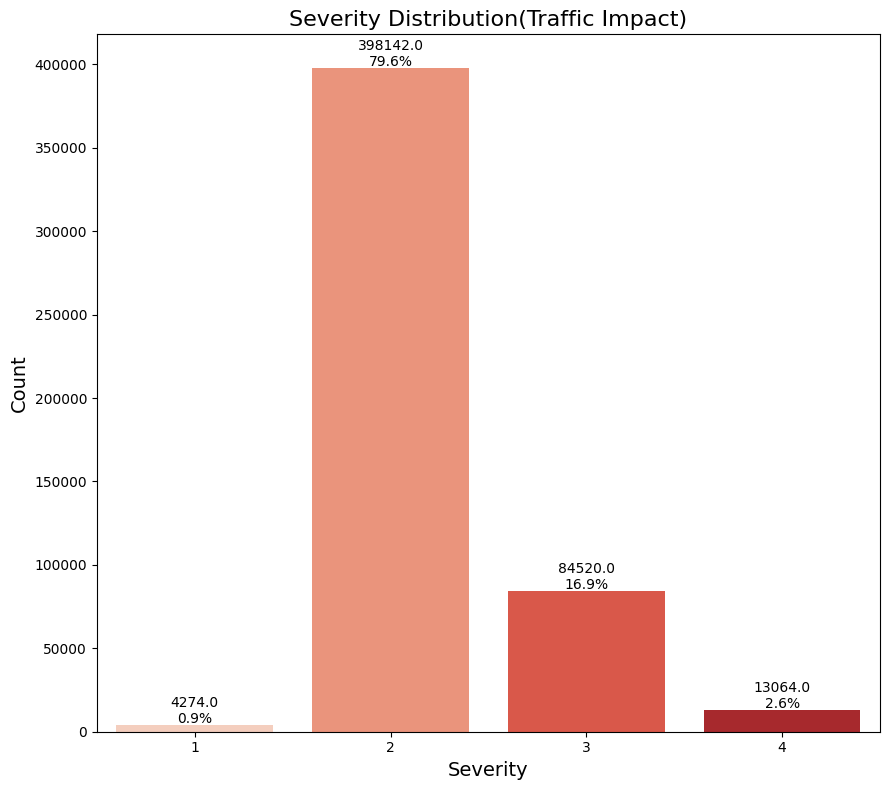

In [ ]:
# Gráfico 2: Distribuição de Severidade
plt.figure(figsize=(9, 8))

# Gráfico de contagem com uma paleta de cores vermelhas
ax = sns.countplot(x=data['Severity'], palette="Reds")

# Adicionar rótulos de contagem e percentuais nas barras
total = len(data)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{(count / total) * 100:.1f}%'
    ax.annotate(f'{count}\n{percentage}',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 10), textcoords='offset points')


# Adicionar título e rótulos dos eixos
plt.title('Severity Distribution(Traffic Impact)', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar o gráfico
plt.show()


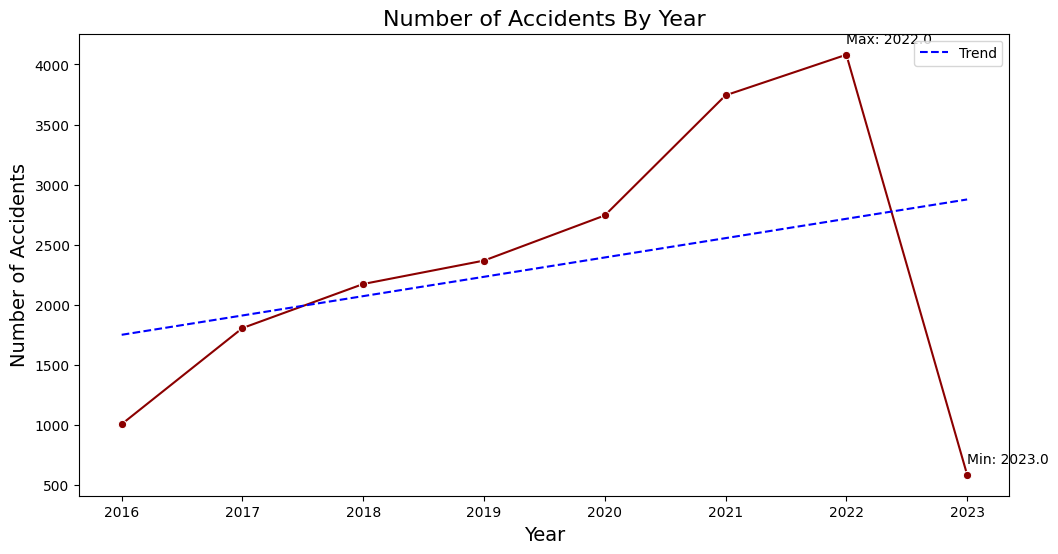

In [ ]:
# Gráfico 3: Acidentes ao Longo do Tempo
data['Year'] = data['Start_Time'].dt.year
accidents_by_year = data['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_by_year.index, y=accidents_by_year.values, color='darkred', marker='o')

# Adicionar uma linha de tendência
z = np.polyfit(accidents_by_year.index, accidents_by_year.values, 1)
p = np.poly1d(z)
plt.plot(accidents_by_year.index, p(accidents_by_year.index), "b--", label='Trend')

# Adicionar anotações para anos significativos
max_year = accidents_by_year.idxmax()
max_count = accidents_by_year.max()
min_year = accidents_by_year.idxmin()
min_count = accidents_by_year.min()
plt.annotate(f'Max: {max_year}', xy=(max_year, max_count), xytext=(max_year, max_count+95),
            )# arrowprops=dict(facecolor='black', shrink=0.1)
plt.annotate(f'Min: {min_year}', xy=(min_year, min_count), xytext=(min_year, min_count+95),
             )#arrowprops=dict(facecolor='black', shrink=0.1)

plt.title('Number of Accidents By Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend()
plt.show()

<ipython-input-90-bc0519f07dc2>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




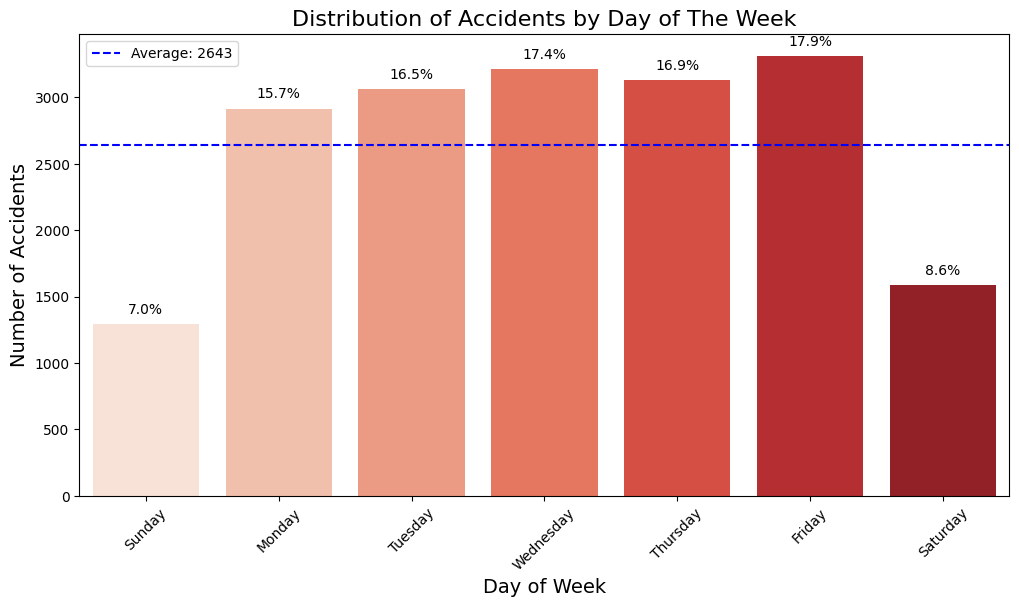

In [ ]:
# Gráfico 4: Distribuição de Acidentes por Dia da Semana
data['Day_of_Week'] = data['Start_Time'].dt.day_name()
accidents_by_day = data['Day_of_Week'].value_counts()
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Ordenar os dados
accidents_by_day = accidents_by_day.reindex(days_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values, palette="Reds")

#linha de referência para a média
mean_accidents = accidents_by_day.mean()
plt.axhline(mean_accidents, color='blue', linestyle='--', label=f'Average: {mean_accidents:.0f}')

#rótulos percentuais
for i in range(len(accidents_by_day)):
    plt.text(i, accidents_by_day[i] + 80, f'{(accidents_by_day[i] / accidents_by_day.sum()) * 100:.1f}%', ha='center')

plt.title('Distribution of Accidents by Day of The Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<ipython-input-89-2842ab1230ba>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




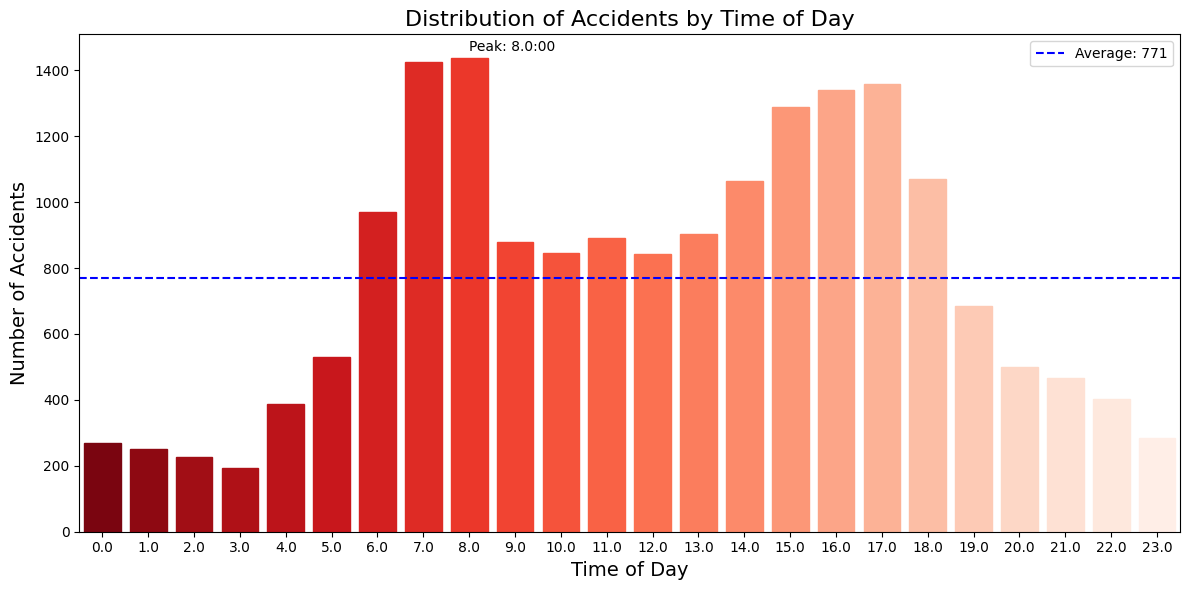

In [ ]:
# Gráfico 5: Distribuição de Acidentes por Hora do Dia
data['Hour'] = data['Start_Time'].dt.hour
accidents_by_hour = data['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=accidents_by_hour.index, y=accidents_by_hour.values, palette="Reds_r")

# Adicionar cores gradientes
color_map = sns.color_palette("Reds_r", len(accidents_by_hour))
for i, bar in enumerate(plt.gca().patches):
    bar.set_color(color_map[i])

# Destacar horários de pico
peak_hours = accidents_by_hour.idxmax()
plt.annotate(f'Peak: {peak_hours}:00', xy=(peak_hours, accidents_by_hour.max()), xytext=(peak_hours, accidents_by_hour.max() + 20)
             )#arrowprops=dict(facecolor='black', shrink=0.05)

# Adicionar linha de média
mean_accidents = accidents_by_hour.mean()
plt.axhline(mean_accidents, color='blue', linestyle='--', label=f'Average: {mean_accidents:.0f}')

plt.title('Distribution of Accidents by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Gráfico Interativo com Plotly: Acidentes no Mapa
fig = px.scatter_mapbox(data, lat="Start_Lat", lon="Start_Lng", color="Severity", zoom=3, height=600,
                        color_continuous_scale="reds",
                        hover_name="State",  # Nome do estado
    hover_data={
        "Start_Lat": True,  # Exibir latitude
        "Start_Lng": True,  # Exibir longitude
        "Severity": True,  # Exibir severidade
        "State": False  # Não repetir o nome do estado duas vezes
    })
fig.update_layout(mapbox_style="open-street-map", title='Accidents on the Map by Severity')
fig.show()

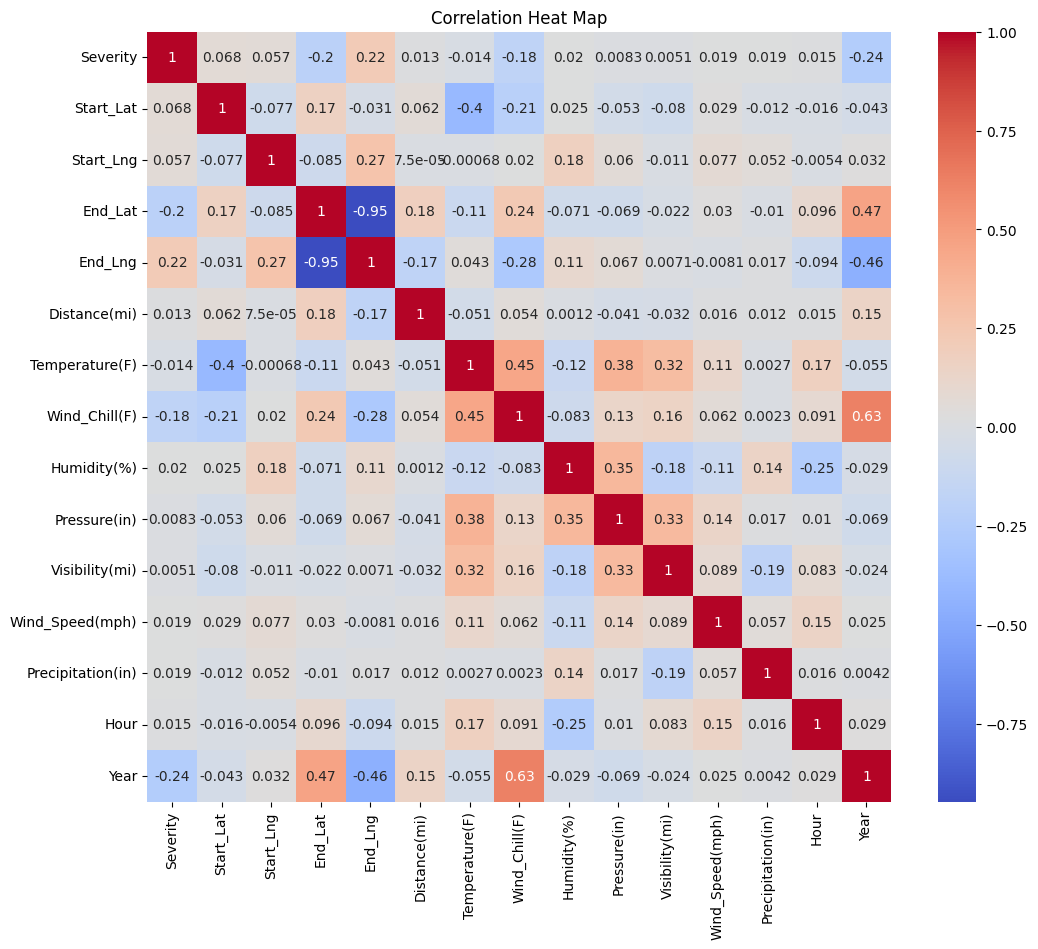

In [ ]:
#Pegar dados numericos para correlação
numeric_data = data.select_dtypes(include=[np.number])

# Análise de correlação
corr = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()